<a href="https://colab.research.google.com/github/adindahita/Classification/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import 

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from google.colab import files
file = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv


In [29]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

# Data Understanding

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

Attribute Information
1. id: unique identifier
2. gender: "Male" or "Female" 
1. age: age of the patient
2. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
1. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
2. ever_married: "No" or "Yes"
1. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
2. Residence_type: "Rural" or "Urban"
1. avg_glucose_level: average glucose level in blood
2. bmi: body mass index
1. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
2. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [30]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [33]:
stroke.shape

(5110, 12)

In [34]:
stroke2=stroke.drop("id", axis=1)

In [35]:
stroke2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b0e8953d0>,
      dtype=object)

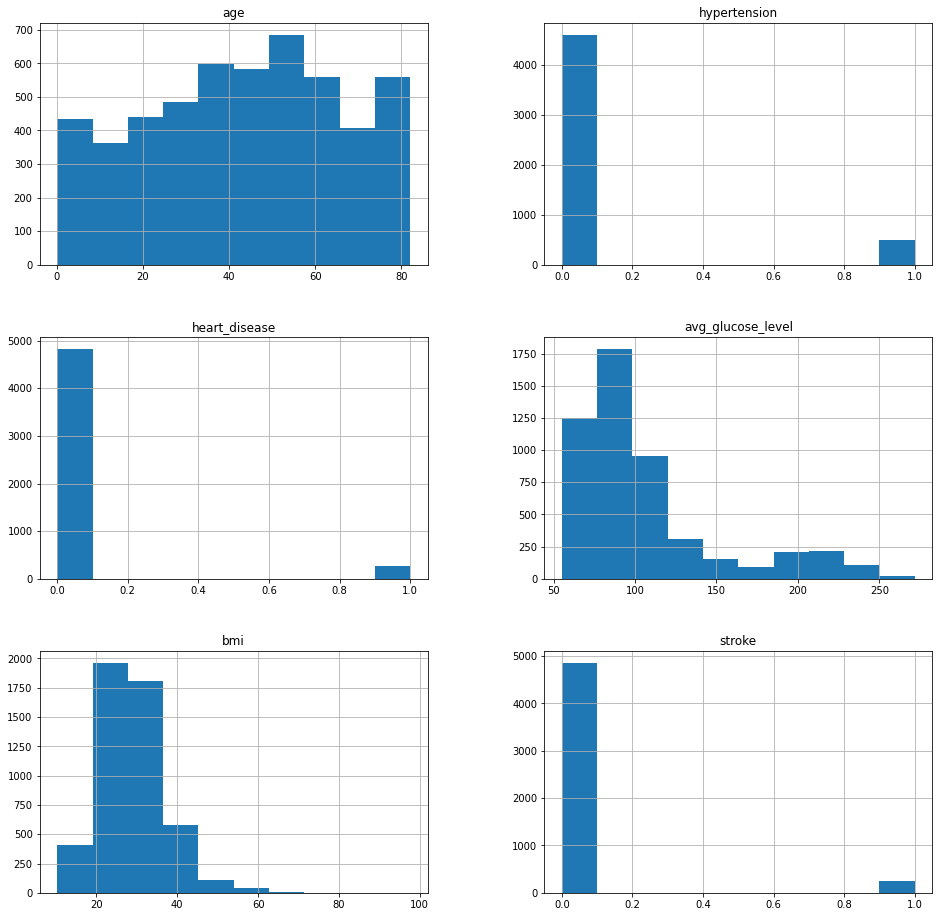

In [36]:
stroke2.select_dtypes(include=['int64', 'float64']).hist(figsize=(16,16))

In [37]:
# attribute bertipe kategorik
categorical = [i for i in stroke2.columns if stroke2[i].dtypes == 'O']

# attribute bertipe numerik
numerical = [i for i in stroke2.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
 numerical:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


# Data Cleaning

###Missing Values

In [41]:
stroke2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [43]:
missing_value = stroke2.apply(lambda x: f'{((x.isnull().sum()/stroke2.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

gender                0.0 %
age                   0.0 %
hypertension          0.0 %
heart_disease         0.0 %
ever_married          0.0 %
work_type             0.0 %
Residence_type        0.0 %
avg_glucose_level     0.0 %
smoking_status        0.0 %
stroke                0.0 %
bmi                  3.93 %
dtype: object

In [44]:
fill=stroke2['bmi'].median()
stroke2['bmi']=stroke2['bmi'].fillna(fill)

In [45]:
stroke2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


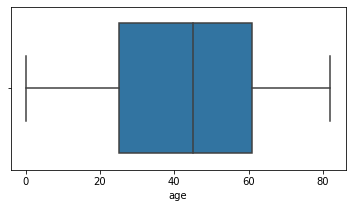

In [46]:
plt.figure(figsize=(6,3))
sns.boxplot(stroke2["age"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


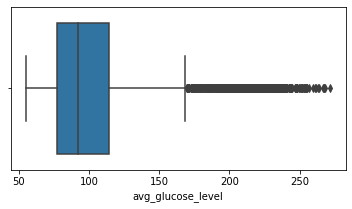

In [47]:
plt.figure(figsize=(6,3))
sns.boxplot(stroke2["avg_glucose_level"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


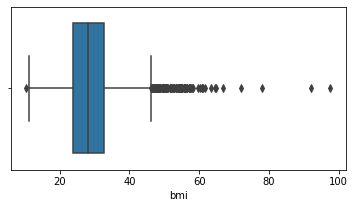

In [48]:
plt.figure(figsize=(6,3))
sns.boxplot(stroke2["bmi"])
plt.show()

In [49]:
stroke2[numerical].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


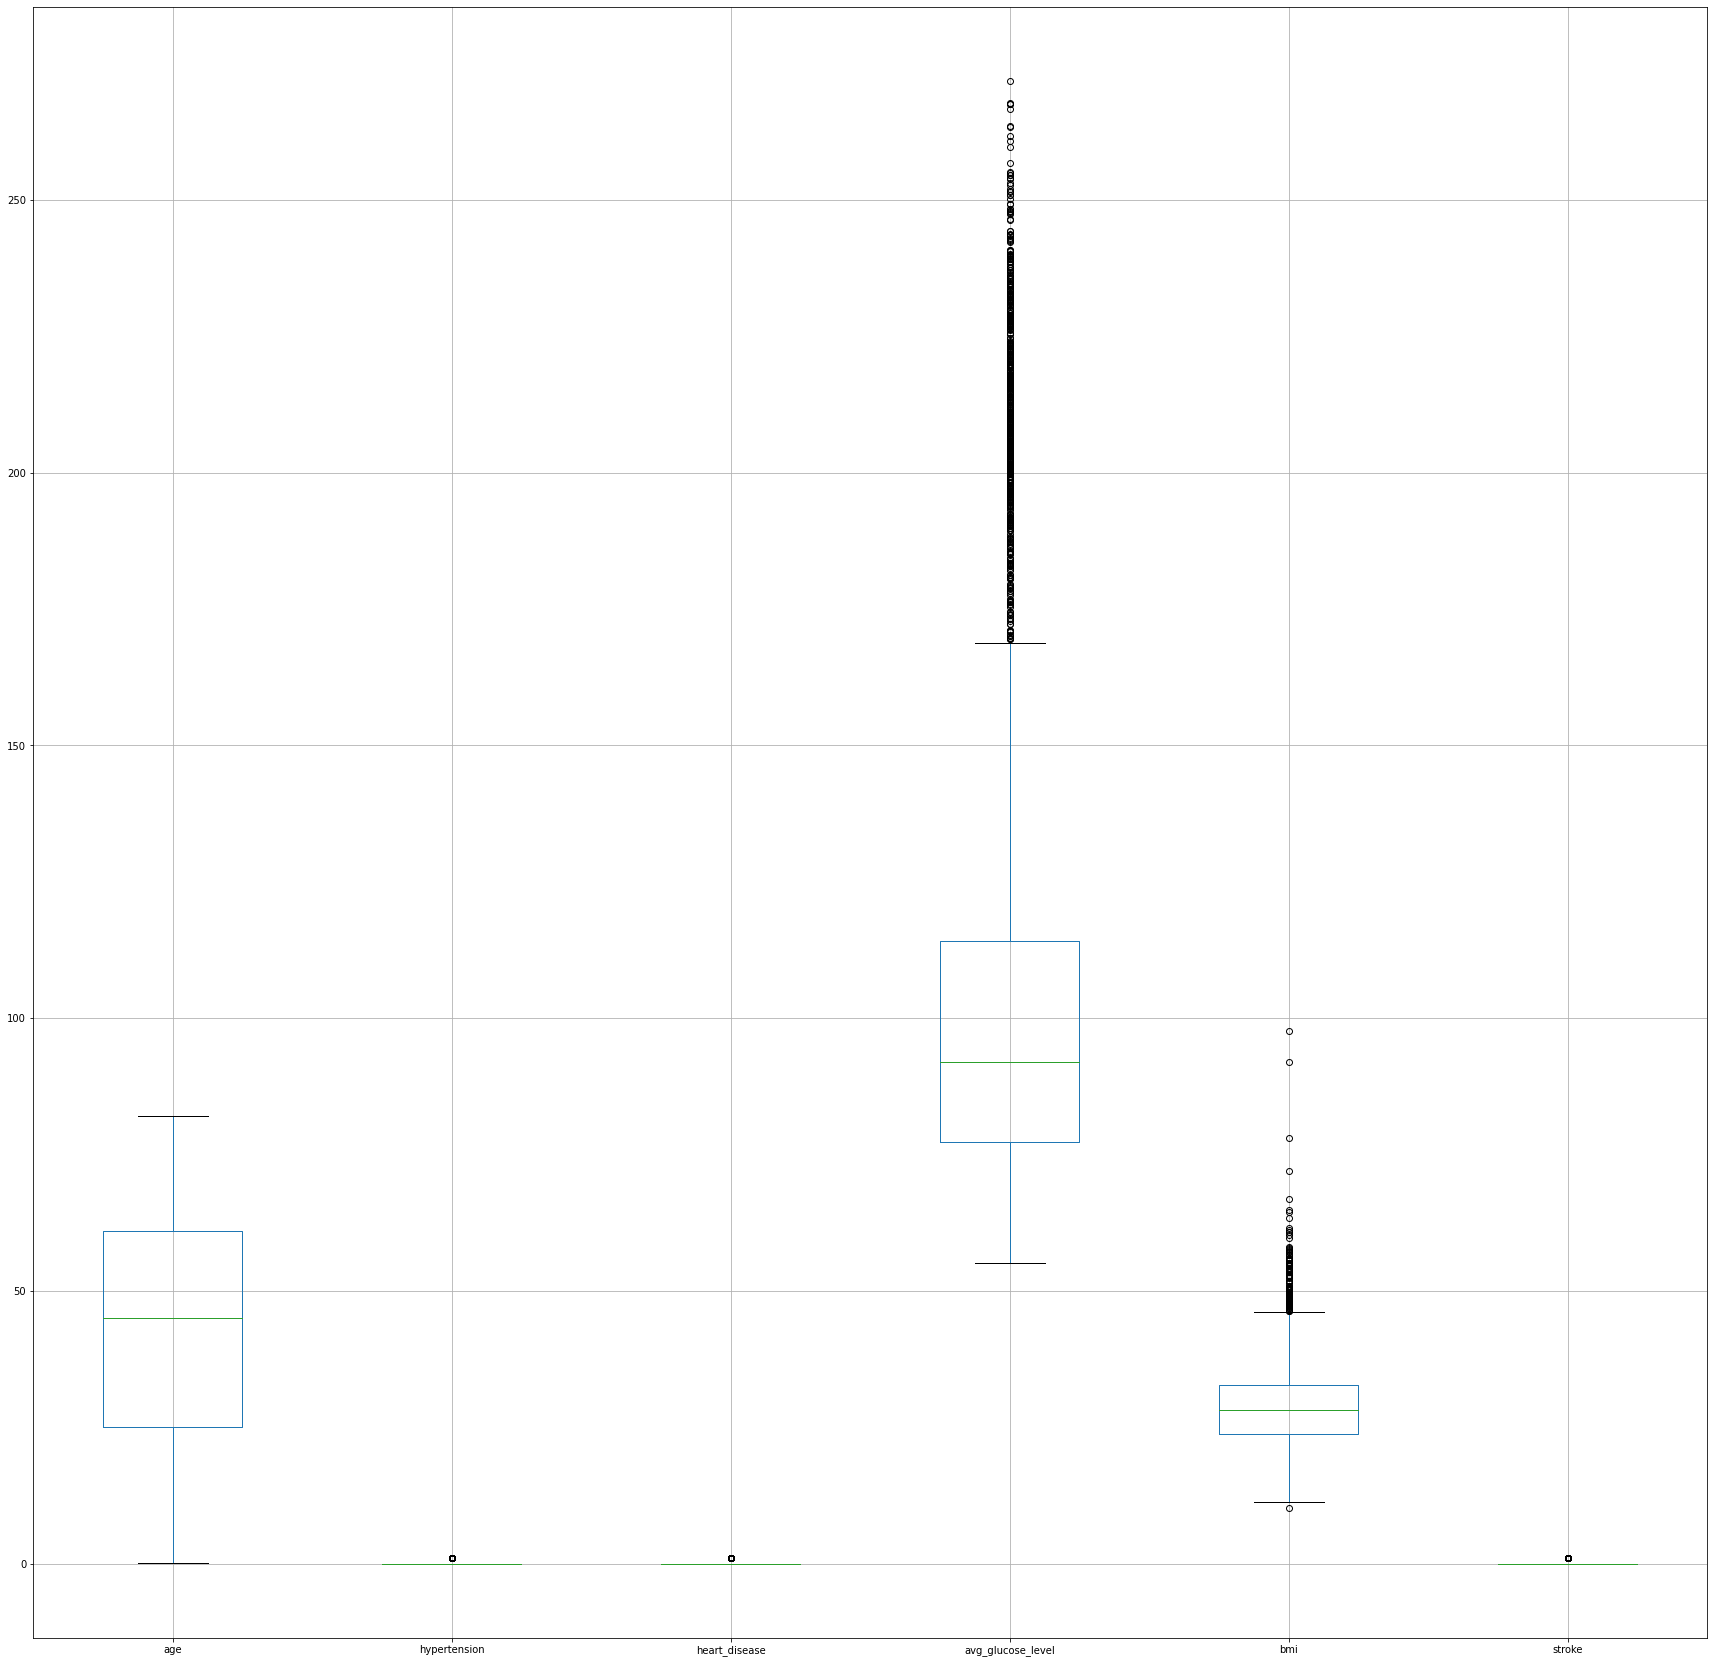

In [50]:
stroke2[numerical].boxplot(figsize=(30,30))
plt.show()

In [51]:
Q1=stroke2['avg_glucose_level'].quantile(0.25)
Q3=stroke2['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
stroke2.loc[(stroke2['avg_glucose_level']>upper_range)|(stroke2['avg_glucose_level']<lower_range),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [52]:
Q1=stroke2['bmi'].quantile(0.25)
Q3=stroke2['bmi'].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
stroke2.loc[(stroke2['bmi']>upper_range)|(stroke2['bmi']<lower_range),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


In [53]:
outlier = ['avg_glucose_level', 'bmi']
print('outlier :',outlier)

outlier : ['avg_glucose_level', 'bmi']


In [54]:
for feature in outlier:
    Q1 = stroke2[feature].quantile(0.25)
    Q3 = stroke2[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (IQR*1.5)
    upper_limit = Q3 + (IQR*1.5)
    stroke2.loc[stroke2[feature]<lower_limit,feature] = lower_limit
    stroke2.loc[stroke2[feature]>upper_limit,feature] = upper_limit

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


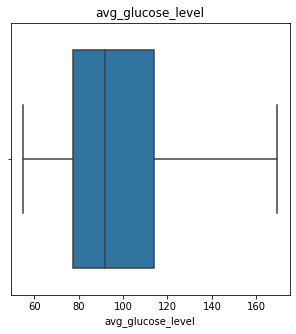

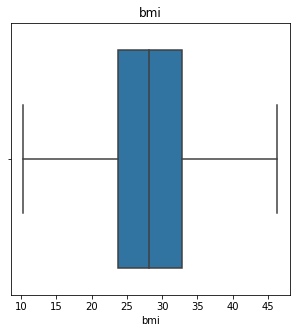

In [55]:
for feature in outlier:
    plt.figure(figsize=(5,5))
    sns.boxplot(stroke2[feature])
    plt.title(feature)

In [56]:
stroke2[outlier].describe()

,avg_glucose_level,bmi
count,5110.000000,5110.000000
mean,100.996204,28.690411
std,33.214738,7.120858
min,55.120000,10.300000
25%,77.245000,23.800000
50%,91.885000,28.100000
75%,114.090000,32.800000
max,169.357500,46.300000


In [57]:
stroke3 = stroke2.rename(columns={
    'ever_married':'married',
    'work_type':'work',
    'Residence_type':'residence',
    'avg_glucose_level':'glucose',
    'smoking_status':'smoking'})

###Duplicated Data

In [58]:
stroke3.duplicated().any()

False

# Exploratory Data

In [59]:
stroke3.describe()

,age,hypertension,heart_disease,glucose,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,100.996204,28.690411,0.048728
std,22.612647,0.296607,0.226063,33.214738,7.120858,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,169.357500,46.300000,1.000000


In [60]:
stroke3.corr()

,age,hypertension,heart_disease,glucose,bmi,stroke
age,1.000000,0.276398,0.263796,0.199720,0.351097,0.245257
hypertension,0.276398,1.000000,0.108306,0.156811,0.154520,0.127904
heart_disease,0.263796,0.108306,1.000000,0.139785,0.044654,0.134914
glucose,0.199720,0.156811,0.139785,1.000000,0.151529,0.115652
bmi,0.351097,0.154520,0.044654,0.151529,1.000000,0.042700
stroke,0.245257,0.127904,0.134914,0.115652,0.042700,1.000000


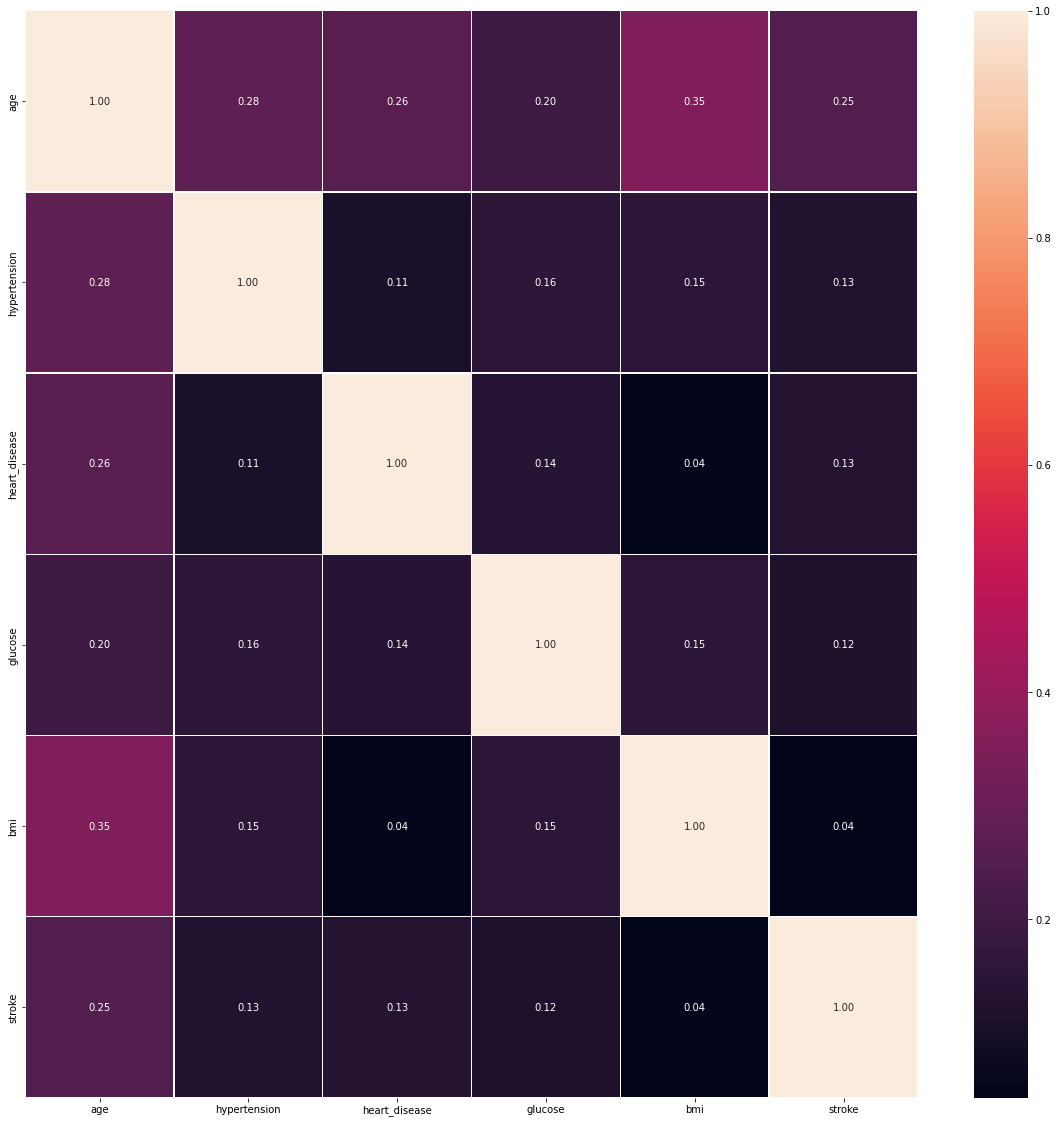

In [61]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(stroke3.corr(), linewidths = .5, annot=True, fmt='.2f')

# Encoding Variables

In [62]:
from sklearn import preprocessing
label_gender=preprocessing.LabelEncoder()
stroke3['gender']=label_gender.fit_transform(stroke3['gender'])
stroke3['gender'].unique()

array([1, 0, 2])

In [63]:
label_gender.classes_

array(['Female', 'Male', 'Other'], dtype=object)

In [64]:
print('Mapping gender')
for i, gender in enumerate(label_gender.classes_):
  print(gender,'=', i)

Mapping gender
Female = 0
Male = 1
Other = 2


In [65]:
label_married=preprocessing.LabelEncoder()
stroke3['married']=label_married.fit_transform(stroke3['married'])
stroke3['married'].unique()

array([1, 0])

In [66]:
label_married.classes_
print('Mapping married')
for i, married in enumerate(label_married.classes_):
  print(married,'=', i)

Mapping married
No = 0
Yes = 1


In [67]:
label_work=preprocessing.LabelEncoder()
stroke3['work']=label_work.fit_transform(stroke3['work'])
stroke3['work'].unique()

array([2, 3, 0, 4, 1])

In [68]:
label_work.classes_
print('Mapping work')
for i, work in enumerate(label_work.classes_):
  print(work,'=', i)

Mapping work
Govt_job = 0
Never_worked = 1
Private = 2
Self-employed = 3
children = 4


In [69]:
label_residence=preprocessing.LabelEncoder()
stroke3['residence']=label_residence.fit_transform(stroke3['residence'])
stroke3['residence'].unique()

array([1, 0])

In [70]:
label_residence.classes_
print('Mapping residence')
for i, residence in enumerate(label_residence.classes_):
  print(residence,'=', i)

Mapping residence
Rural = 0
Urban = 1


In [71]:
label_smoking=preprocessing.LabelEncoder()
stroke3['smoking']=label_smoking.fit_transform(stroke3['smoking'])
stroke3['smoking'].unique()

array([1, 2, 3, 0])

In [72]:
label_smoking.classes_
print('Mapping smoking')
for i, smoking in enumerate(label_smoking.classes_):
  print(smoking,'=', i)

Mapping smoking
Unknown = 0
formerly smoked = 1
never smoked = 2
smokes = 3


In [73]:
stroke3.head()

,gender,age,hypertension,heart_disease,married,work,residence,glucose,bmi,smoking,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.0,2,1


# Data Partition

In [74]:
# data input
x = stroke3.drop('stroke', axis=1)
# data output
y = stroke3['stroke']

In [75]:
x.head()

,gender,age,hypertension,heart_disease,married,work,residence,glucose,bmi,smoking
0,1,67.0,0,1,1,2,1,169.3575,36.6,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2
2,1,80.0,0,1,1,2,0,105.9200,32.5,2
3,0,49.0,0,0,1,2,1,169.3575,34.4,3
4,0,79.0,1,0,1,3,0,169.3575,24.0,2


###Feature Selection

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)

ExtraTreesRegressor()

In [77]:
etr_model.feature_importances_

array([0.05127229, 0.24542677, 0.02828737, 0.02199112, 0.0209712 ,
       0.06606091, 0.05787975, 0.17973117, 0.22845698, 0.09992244])

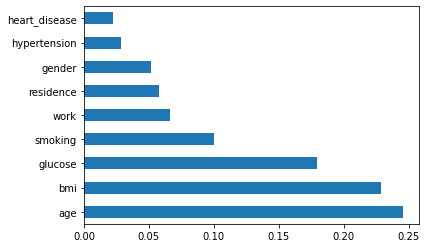

In [78]:
feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
feature_imp.nlargest(9).plot(kind='barh')

In [79]:
x_fit=stroke3[['heart_disease','hypertension','smoking','glucose','bmi','age']]

In [80]:
x_fit.head()

,heart_disease,hypertension,smoking,glucose,bmi,age
0,1,0,1,169.3575,36.6,67.0
1,0,0,2,169.3575,28.1,61.0
2,1,0,2,105.9200,32.5,80.0
3,0,0,3,169.3575,34.4,49.0
4,0,1,2,169.3575,24.0,79.0


In [81]:
x_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   heart_disease  5110 non-null   int64  
 1   hypertension   5110 non-null   int64  
 2   smoking        5110 non-null   int64  
 3   glucose        5110 non-null   float64
 4   bmi            5110 non-null   float64
 5   age            5110 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


###Feature Scaling

In [82]:
input_variables = [i for i in x_fit.columns if i != 'stroke']

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data scale standardization
x_fit[input_variables] = scaler.fit_transform(x_fit[input_variables])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [84]:
x_fit.head()

,heart_disease,hypertension,smoking,glucose,bmi,age
0,4.185032,-0.328602,-0.351781,2.058363,1.110872,1.051434
1,-0.238947,-0.328602,0.581552,2.058363,-0.082921,0.786070
2,4.185032,-0.328602,0.581552,0.148256,0.535043,1.626390
3,-0.238947,-0.328602,1.514885,2.058363,0.801890,0.255342
4,-0.238947,3.043196,0.581552,2.058363,-0.658751,1.582163


###Data Split

In [85]:
from sklearn.model_selection import train_test_split
# data partition into 80% training data and 20% testing data    
x_train, x_test, y_train, y_test = train_test_split(x_fit, y, 
                                   test_size=0.2, random_state=1)

In [86]:
print('x_train=', x_train.shape)
print('x_test=', x_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

x_train= (4088, 6)
x_test= (1022, 6)
y_train= (4088,)
y_test= (1022,)


In [87]:
x_train.head()

,heart_disease,hypertension,smoking,glucose,bmi,age
4152,-0.238947,-0.328602,1.514885,-0.825805,-0.096966,0.520706
4051,-0.238947,-0.328602,0.581552,2.058363,-0.897509,0.520706
5076,-0.238947,-0.328602,0.581552,2.058363,-0.799197,-0.408069
874,-0.238947,-0.328602,0.581552,-1.325030,-0.279546,1.626390
3534,-0.238947,-0.328602,0.581552,0.216305,-1.346937,0.786070


In [88]:
y_train.head()

4152    0
4051    0
5076    0
874     0
3534    0
Name: stroke, dtype: int64

# Model Training & Evaluating

###Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [90]:
# menyimpan hasil prediksi yang diperoleh ke atribut y_pred
y_pred = classifier.predict(x_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[922  40]
 [ 55   5]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       962
           1       0.11      0.08      0.10        60

    accuracy                           0.91      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.89      0.91      0.90      1022



# SMOTE

In [92]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=13)
x_res, y_res = sm.fit_resample(x_train, y_train)
print('Original dataset shape is ', Counter(y_train))
print('Resample dataset shape is ', Counter(y_res))

Original dataset shape is  Counter({0: 3899, 1: 189})
Resample dataset shape is  Counter({0: 3899, 1: 3899})


###Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
logregression = LogisticRegression()
logregression.fit(x_res, y_res)

LogisticRegression()

In [94]:
y_pred_log = logregression.predict(x_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[708 254]
 [  7  53]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       962
           1       0.17      0.88      0.29        60

    accuracy                           0.74      1022
   macro avg       0.58      0.81      0.57      1022
weighted avg       0.94      0.74      0.81      1022



In [96]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_log})
df

,Actual,Predicted
4673,0,0
3232,0,1
3694,0,0
1070,0,1
4163,0,0
...,...,...
2030,0,0
4555,0,0
1056,0,0
854,0,0


###KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_res, y_res)

KNeighborsClassifier()

In [98]:
y_pred_knn = knn.predict(x_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[799 163]
 [ 32  28]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       962
           1       0.15      0.47      0.22        60

    accuracy                           0.81      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.91      0.81      0.85      1022



In [100]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_knn})
df2

,Actual,Predicted
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
...,...,...
2030,0,1
4555,0,0
1056,0,0
854,0,0


###Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_res, y_res)

DecisionTreeClassifier()

In [102]:
y_pred = classifier.predict(x_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[847 115]
 [ 38  22]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       962
           1       0.16      0.37      0.22        60

    accuracy                           0.85      1022
   macro avg       0.56      0.62      0.57      1022
weighted avg       0.91      0.85      0.88      1022



In [104]:
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df3

,Actual,Predicted
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
...,...,...
2030,0,1
4555,0,0
1056,0,0
854,0,0


# Model Inference

In [105]:
data = {'heart_disease':[0,0,0,0,0],'hypertension':[0,0,0,0,1],'smoking':[0,1,0,0,2],	'glucose':[57.93,78.8,78.81,95.12,87.96],	'bmi':[30.9,29.3,19.6,18,39.2],	'age':[14,75,78,3,58]}
data = pd.DataFrame(data)
data.head()

,heart_disease,hypertension,smoking,glucose,bmi,age
0,0,0,0,57.93,30.9,14
1,0,0,1,78.80,29.3,75
2,0,0,0,78.81,19.6,78
3,0,0,0,95.12,18.0,3
4,0,1,2,87.96,39.2,58


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(data)

In [110]:
list(data1)

[array([ 0.        , -0.5       , -0.75      , -1.74320082,  0.44864421,
        -1.01136701]),
 array([ 0.        , -0.5       ,  0.5       , -0.07390647,  0.24354972,
         0.94095538]),
 array([ 0.        , -0.5       , -0.75      , -0.07310661, -0.99983567,
         1.03697124]),
 array([ 0.        , -0.5       , -0.75      ,  1.23145452, -1.20493017,
        -1.36342515]),
 array([0.        , 2.        , 1.75      , 0.65875938, 1.51257192,
        0.39686554])]

In [107]:
y_pred1 = classifier.predict(data1)
print('Prediksi Stroke: ')
print(y_pred1)

Prediksi Stroke: 
[0 0 1 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [112]:
import pickle
pickle.dump(classifier,open('model.pkl','wb'))